In [6]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

class Node:
    def __init__(self, index):
        self.edges = []
        self.index = index
        self.parent = None
    
    def add_edge(self, edge):
        self.edges.append(edge)
        
    def add_parent(self, parent):
        self.edges.append(parent)
        self.parent = parent
        
class Graph:
    def __init__(self):
        self.nodes = []

    def add_node(self, node):
        self.nodes.append(node)

n = 1000
graph = Graph()
root = Node(0)
graph.add_node(root)

def binary_tree(node):
    if len(graph.nodes) < 1023:
        left = Node(len(graph.nodes))
        right = Node(len(graph.nodes)+1)
        left.add_parent(node)
        right.add_parent(node)
        node.add_edge(left)
        node.add_edge(right)
        graph.add_node(left)
        graph.add_node(right)
        binary_tree(left)
        binary_tree(right)

In [7]:
binary_tree(root)

In [8]:
pi_original = [0] * 1023         
def binary_tree_original(node):
    pi_original[node.index] = len(node.edges) / 1022
    edges = list(set(node.edges).difference(set([node.parent])))
    if len(edges) == 2:
        binary_tree_original(edges[0])
        binary_tree_original(edges[1])
binary_tree_original(root)

X = []
y = []
# random walk
pi_e = [0] * 1023
pi_0 = random.choice(graph.nodes)
m = 0
for i in range(50000000):
    if random.random() < 0.5:
        pi_0 = random.choice(pi_0.edges)
    pi_e[pi_0.index] += 1
    # estimate
    #a = np.array(pi_e)/(i+1)
    m += 1
    if m > 10000:
        a = np.array(pi_e.copy())
        a = a / np.sum(a)
        a = sum(abs(a-pi_original))/2
        X.append(a)
        y.append(i)
        m = 0

In [9]:
X_anel = []
y_anel = []
pi_e = [0] * 1000   
pi_original = [2/1000] * 1000
pi_0 = random.randint(0,999)
m = 0
for i in range(50000000):
    if random.random() < 0.5:
        step = 1 if random.randint(0,1) == 1 else -1
        pi_0 = (pi_0 + step) % 1000 # mod 1000
    pi_e[pi_0] += 1
    # estimate
    #a = np.array(pi_e)/(i+1)
    m += 1
    if m > 10000:
        a = np.array(pi_e.copy())
        a = a / np.sum(a)
        a = sum(abs(a-pi_original))/2
        X_anel.append(a)
        y_anel.append(i)
        m = 0   

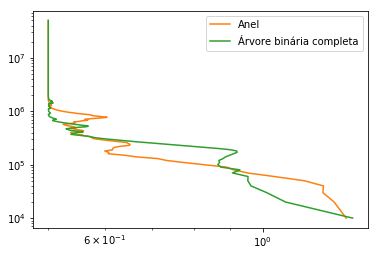

In [13]:
plt.loglog(X_anel,y_anel, label='Anel')
plt.loglog(X,y, label='Árvore binária completa')
plt.legend()
plt.show()

In [ ]:
def to_moves(i,j):
    moves = []
    if i != 0:
        moves.append([-1,0]) #left = 0 if i == 0 else 1
    if i != 31:
        moves.append([1,0]) #right = 0 if i == 31 else 1
    if j != 0:
        moves.append([0,1]) #up = 0 if j == 0 else 1
    if j != 31:
        moves.append([0,-1]) #down = 0 if j == 31 else 1
    return moves

def n_edges(i,j):
    left = 0 if i == 0 else 1
    right = 0 if i == 31 else 1
    up = 0 if j == 0 else 1
    down = 0 if j == 31 else 1
    return left + right + up + down

total_edges = (32-1)*32 + (32-1)*32
matrix = np.zeros((32,32))
X_grid = []
y_grid = []
pi_original = np.zeros((32,32))
for i in range(32):
    for j in range(32):
        edges = n_edges(i,j)
        pi_original[i][j] = edges/total_edges
                   
pi_e = np.zeros((32,32))
pi_0 = [random.randint(0,31), random.randint(0,31)]
m = 0
for i in range(50000000):
    if random.random() < 0.5:
        r = random.choice(to_moves(pi_0[0],pi_0[1]))
        pi_0 = [r[0], r[1]]
    pi_e[pi_0[0]][pi_0[1]] += 1
    # estimate
    #a = np.array(pi_e)/(i+1)
    m += 1
    if m > 10000:
        a = np.array(pi_e.copy())
        a = a / np.sum(a)
        a = sum(abs(a-pi_original))/2
        X_grid.append(a)
        X_grid.append(i)
        m = 0